# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [145]:
import math
import matplotlib.pyplot as plt
from random import randint, uniform
from timeit import timeit
MAX_VAL = 32767

def jarvismarch(inputSet: list) -> list:
	'''
	Returns the list of points that lie on the convex hull (graham scan algorithm)
		Parameters:
			inputSet (list): a list of 2D points

		Returns:
			outputSet (list): a list of 2D points
	'''
    #ADD YOUR CODE HERE
	#-----------------------------AUXILIARY_FUNCTIONS_START-------------------------------
	def direction(p1: tuple, p2: tuple, p3: tuple) -> int:
		'''
		Returns
				1: counter clockwise rotation
				-1: clockwise rotation
				0: points are collinear
			
			Parameters:
				p1 (tuple): a tuple storing x and y coordinates of the p1
                p2 (tuple): a tuple storing x and y coordinates of the p2
                p3 (tuple): a tuple storing x and y coordinates of the p3

			Returns:
				direction (int): integer indicating direction of rotation
		'''
		cross_product = (p2[0]-p1[0])*(p3[1]-p2[1]) - (p3[0]-p2[0])*(p2[1]-p1[1])
		if cross_product > 0:
			return 1 # counter clockwise
		elif cross_product < 0:
			return -1 # clockwise
		else: # cross_product == 0
			return 0 # collinear


	def distance(p1: tuple, p2: tuple) -> float:
		'''
		Returns distance between two points
			Parameters:
				p1 (tuple): a tuple storing x and y coordinates of the p1
                p2 (tuple): a tuple storing x and y coordinates of the p2

			Returns:
				distance (float): a floating point number
		'''
		return math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
	#------------------------------AUXILIARY_FUNCTIONS_END---------------------------------

	# ALGORITHM BEGINS HERE
	# Handling empty set
	if len(inputSet) == 0:
		return []
	
	leftmost = min(inputSet, key=lambda p: (p[1], p[0])) # Starting point
	outputSet = [leftmost] # List to store points on the convex hull
	current = leftmost # Points to currently considering point
	while True:
		end = inputSet[0]
		for point in inputSet:
			if point == current:
				continue # Skip the same points

			rotation_direction = direction(current, end, point)
			if rotation_direction == -1:
				end = point
			elif rotation_direction == 0: 
				if distance(current, point) > distance(current, end): #if the points are colinear, take the one further away from current
					end = point
		
		outputSet.append(end)
		current = end
		if end == outputSet[0]:
			break

	return outputSet[:-1] # Do not include the last point, since it is the duplicate of leftmost (starting) point

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [146]:
def grahamscan(inputSet: list) -> list:
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
        Parameters:
            inputSet (list): a list of 2D points

        Returns:
            outputSet (list): a list of 2D points
    '''
    #ADD YOUR CODE HERE
    #-----------------------------AUXILIARY_FUNCTIONS_START-------------------------------
    def calc_polar_angle(point: tuple, origin: tuple) -> float:
        '''
        Returns the value of the polar angle (in radians) made by point with respect to origin
			Parameters:
				point (tuple): a tuple storing x and y coordinates of the point
                origin (tuple): a tuple storing x and y coordinates of the origin
            Returns:
				angle (float): a floating point number
        '''
        x, y = point
        oX, oY = origin
        return math.atan2(y-oY, x-oX)


    def sort_by_angle(points: list, origin: tuple):
        '''
        Sorts the content of the points by the polar angle each element of points make with respect to origin
			Parameters:
				points (list): a list of 2D points
                origin (tuple): a tuple storing x and y coordinates of the origin
                
        '''
        points.sort(key=lambda point: (calc_polar_angle(point, origin), point[0], -point[1]))


    def direction(p1: tuple, p2: tuple, p3: tuple) -> int:
        '''
		Returns
				1: counter clockwise rotation
				-1: clockwise rotation
				0: points are collinear
			
			Parameters:
				p1 (tuple): a tuple storing x and y coordinates of the p1
                p2 (tuple): a tuple storing x and y coordinates of the p2
                p3 (tuple): a tuple storing x and y coordinates of the p3

			Returns:
				direction (int): integer indicating direction of rotation
		'''
        cross_product = (p2[0]-p1[0])*(p3[1]-p2[1]) - (p3[0]-p2[0])*(p2[1]-p1[1])

        if cross_product > 0:
            return 1 # counter clockwise
        elif cross_product < 0:
            return -1 # clockwise
        else: # cross_product == 0
            return 0 # collinear
	#------------------------------AUXILIARY_FUNCTIONS_END---------------------------------
	
    # ALGORITHM BEGINS HERE
    points = list(dict.fromkeys(inputSet)) # Remove all duplucates, takes O(n) space at most
    
    n = len(points) # Takes O(1) space
    # Base cases
    if n < 2:
        return points # Handlig empty set and 1-point cases
    
    p0 = min(points, key=lambda p: (p[1], p[0])) # The first point on hull (origin)
    
	# Sort points by the polar angle and distance
    sort_by_angle(points, p0)
    
    # Handling case when all the points are on one line (collinear)
    linear = True # Takes O(1) space
    for i in range(2, n):
        if direction(p0, points[i-1], points[i]) != 0:
            linear = False
    if linear:
        return [p0, points[-1]] # Return two end-points of the set
    
    # Other cases
    outputSet = [] # Resulting list to store points on convex hull
    for i in range(n + 1):
        p = points[i] if i < n else points[0]
        while (len(outputSet) >= 2 and \
               direction(outputSet[-2], outputSet[-1], p) <= 0): # <= 0: don't inlcude collinear points, < 0: inlcude collinear points
            outputSet.pop()
        outputSet.append(p)
    
    return outputSet[:-1] # Do not include the last point, since it is the duplicate of p0 (origin)

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [147]:
def chen(inputSet: list) -> list:

	'''
	Returns the list of points that lie on the convex hull (Chan's algorithm)
        Parameters:
            inputSet (list): a list of 2D points

		Returns:
			outputSet (list): a list of 2D points
	'''
	#ADD YOUR CODE HERE
    #-----------------------------AUXILIARY_FUNCTIONS_START-------------------------------
	def distance(p1: tuple, p2: tuple) -> float:
		'''
		Returns distance between two points
			Parameters:
				p1 (tuple): a tuple storing x and y coordinates of the p1
                p2 (tuple): a tuple storing x and y coordinates of the p2

			Returns:
				distance (float): a floating point number
		'''
		return math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
	

	def direction(p1: tuple, p2: tuple, p3: tuple) -> int:
		'''
		Returns
				1: counter clockwise rotation
				-1: clockwise rotation
				0: points are collinear
			
			Parameters:
				p1 (tuple): a tuple storing x and y coordinates of the p1
                p2 (tuple): a tuple storing x and y coordinates of the p2
                p3 (tuple): a tuple storing x and y coordinates of the p3

			Returns:
				direction (int): integer indicating direction of rotation
		'''
		cross_product = (p2[0]-p1[0])*(p3[1]-p2[1]) - (p3[0]-p2[0])*(p2[1]-p1[1])
		
		if cross_product > 0:
			return 1 # counter clockwise
		elif cross_product < 0:
			return -1 # clockwise
		else: # cross_product == 0
			return 0 # collinear


	def index_of_right_tangent(hull: list, p: tuple) -> int:
		'''
		Return the index of the point in hull that the right tangent line from p to hull touches.
			Parameters:
				hull (list): a list of 2D points
				p (tuple): a tuple storing x and y coordinates of the p
			
			Returns:
				index (int): an integer value indicating the index of the needed point in the given hull
		'''
		# Using binary search to find the right tangent
		left, right = 0, len(hull)
		last_left = direction(p, hull[0], hull[-1])
		next_left = direction(p, hull[0], hull[(left + 1) % len(hull)])
		while left < right:
			mid = (left + right) // 2
			last_mid = direction(p, hull[mid], hull[(mid - 1) % len(hull)])
			next_mid = direction(p, hull[mid], hull[(mid + 1) % len(hull)])
			side_mid = direction(p, hull[left], hull[mid])

			if last_mid != -1 and next_mid != -1: # If point is on the right side of the line
				return mid
			elif side_mid == 1 and (next_left == -1 or last_left == next_left) or \
												side_mid == -1 and last_mid == -1:
				right = mid
			else:
				left = mid + 1
				last_left = -next_mid
				
				if left < len(hull):
					next_left = direction(p, hull[left], hull[(left + 1) % len(hull)])
				else:
					return -1
		return left


	def smallest_point_pair(hulls: list) -> tuple:
		'''
		Returns the (hull, point) index pair that is minimal.
		The 'minimal' point is the one with the smallest y-coordinate, or the largest x-coordinate if the y-coordinates are equal.
			Parameters:
				hulls (list): a list of hulls

			Returns:
				min_index_pair (tuple): a pair of needed hull index and point index
		'''
		min_index_pair = None
		# Iterate over all hulls
		for hull_index in range(len(hulls)):
			# Iterate over all points in the current hull to find the minimal point
			for point_index in range(len(hulls[hull_index])):
				if min_index_pair is None or \
					(hulls[hull_index][point_index][0], -hulls[hull_index][point_index][1]) < \
						(hulls[min_index_pair[0]][min_index_pair[1]][0], -hulls[min_index_pair[0]][min_index_pair[1]][1]):
					min_index_pair = (hull_index, point_index)

		# Return the minimum index pair
		return min_index_pair
	

	def pair_next_point(hulls: list, pair: tuple) -> tuple:
		'''
		Returns the (hull, point) index pair of the next point in the convex hull.
			Parameters:
				hulls (list): a list of hulls
				pair (tuple): an (hull, point) index pair
		'''
		point = hulls[pair[0]][pair[1]]
		next_point_pair = (pair[0], (pair[1] + 1) % len(hulls[pair[0]]))
		for i in range(len(hulls)):
			if i != pair[0]:
				tang_idx = index_of_right_tangent(hulls[i], point)
				tang_point = hulls[i][tang_idx]
				next_point = hulls[next_point_pair[0]][next_point_pair[1]]
				direction_val = direction(point, next_point, tang_point)
				if direction_val == -1 or (direction_val == 0 and distance(point, tang_point) > distance(point, next_point)):
					next_point_pair = (i,tang_idx)

		return next_point_pair
	#------------------------------AUXILIARY_FUNCTIONS_END---------------------------------
	
	# ALGORITHM BEGINS HERE
	if len(inputSet) < 3:
		return inputSet
	for t in range(3, len(inputSet)):
		m = 2 ** (2 ** t)
		hulls = [] # Start from 3 to avoid unnecessary iterations
		for i in range(0, len(inputSet), m):
			hulls.append(grahamscan(inputSet[i:i+m]))

		hull = [smallest_point_pair(hulls)] # Temporary storage for the (hull, point) index pairs, takes O(h) space, h is a number of point on convex hull
		for i in range(m):
			p = pair_next_point(hulls, hull[-1])
			if p == hull[0]:
				outputSet = [hulls[h][i] for h, i in hull]
				return outputSet[:-1]
			hull.append(p)

	

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [148]:
class TestDataGenerator():
    """
    A class to represent a synthetic data generator.
    """

    def __init__(self):
        self.inputSet = []
        
    def data_generation(self, n: int) -> list:
        self.inputSet.clear()
        for i in range(n):
            self.inputSet.append((randint(0, MAX_VAL), randint(0, MAX_VAL)))
        return self.inputSet

    
    def generate_colinear_points(self, n: int) -> list:
        self.inputSet.clear()
        for i in range(n):
            a = randint(0,MAX_VAL)
            self.inputSet.append((a,a))
        return self.inputSet

    
    def generate_random_points_in_triangle(self, num_points):
        v1 = (100,100) # Manual vertices of the triangle to maximise the area
        v2 = (MAX_VAL//2,MAX_VAL-100)
        v3 = (MAX_VAL-100,100)
        self.inputSet.clear()
        self.inputSet.extend((v1,v2,v3))

        min_x = min(v1[0], v2[0], v3[0])
        max_x = max(v1[0], v2[0], v3[0])
        min_y = min(v1[1], v2[1], v3[1])
        max_y = max(v1[1], v2[1], v3[1])

        while len(self.inputSet) < num_points:
            x = randint(min_x, max_x)
            y = randint(min_y, max_y)
            # Barycentric coordinates formula
            alpha = ((v2[1] - v3[1])*(x - v3[0]) + (v3[0] - v2[0])*(y - v3[1])) / ((v2[1] - v3[1])*(v1[0] - v3[0]) + (v3[0] - v2[0])*(v1[1] - v3[1]))
            beta = ((v3[1] - v1[1])*(x - v3[0]) + (v1[0] - v3[0])*(y - v3[1])) / ((v2[1] - v3[1])*(v1[0] - v3[0]) + (v3[0] - v2[0])*(v1[1] - v3[1]))
            gamma = 1.0 - alpha - beta
            if 0 <= alpha <= 1 and 0 <= beta <= 1 and 0 <= gamma <= 1:
                self.inputSet.append((x, y))
        return self.inputSet
    

    def random_circular_data_generation(self, n: int) -> list:
        origin_x = MAX_VAL//2
        origin_y = MAX_VAL//2
        points = []

        for _ in range(n):
            # Generate a random angle
            theta = uniform(0, 2*math.pi)

            # Generate a random radius within the range
            r = uniform(MAX_VAL//2 - 1, MAX_VAL//2)

            # Convert polar coordinates to cartesian
            x = origin_x + r * math.cos(theta)
            y = origin_y + r * math.sin(theta)

            points.append((round(x), round(y)))

        return points

    

Use the cell below to implement the requested **experimental framework** API.

In [149]:
class ExperimentalFramework():
    """
    A class to represent an experimental framework.
    """
    def __init__(self, n):
        self.generator = TestDataGenerator()
        self.inputSet = self.generator.data_generation(n)
        #jarvis-march algorithm
        self.jarvis_time = timeit(lambda: jarvismarch(self.inputSet), number=10) #repeat 10 times and take avg
        self.jarvis_outputSet = jarvismarch(self.inputSet)
        #graham-scan algorithm
        self.graham_time = timeit(lambda: grahamscan(self.inputSet), number=10) #repeat 10 times and take avg
        self.graham_outputSet = grahamscan(self.inputSet)
        #chen-algo algorithm
        self.chen_time = timeit(lambda: chen(self.inputSet), number=10) #repeat 10 times and take avg
        self.chen_outputSet = chen(self.inputSet)


    def display_convex_hull(self, inputSet: list, outputSet: list, name: int):
        x = [point[0] for point in outputSet]
        y = [point[1] for point in outputSet]
        notx = [point[0] for point in inputSet]
        noty = [point[1] for point in inputSet]
        x.append(x[0])
        y.append(y[0])
        plt.plot(x, y, marker='o', linestyle='-', color='r')
        plt.scatter(notx, noty, marker='o', linestyle='-')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title(f'Plot of the Convex Points: {name}')
        plt.grid(True)
        plt.show()

    
    def timeBestJarvis(self,n,step): #this occurs when h = 3
        data = TestDataGenerator()
        best_times_jarvis = []
        for x in range(0, n+1, step):
            inputSet = data.generate_random_points_in_triangle(x)
            best_times_jarvis.append((timeit(lambda: jarvismarch(inputSet), number=10), x))
            

        return best_times_jarvis
      
    def timeBestChan(self,n,step): #this occurs when h = 3
        data = TestDataGenerator()
        best_times_chan = []
        for x in range(0, n+1, step):
            inputSet = data.generate_random_points_in_triangle(x)
            best_times_chan.append((timeit(lambda: chen(inputSet), number=10), x))
        return best_times_chan
    
    def testTimeBestCaseGraham(self,n,step): #this occurs when the points are already sorted by polar angle (very rare)
        graham = TestDataGenerator()
        
        def calc_polar_angle(point: tuple, origin: tuple) -> float:
            '''
            Returns the value of the polar angle (in radians) made by point with respect to origin
                Parameters:
                    point (tuple): a tuple storing x and y coordinates of the point
                    origin (tuple): a tuple storing x and y coordinates of the origin
                Returns:
                    angle (float): a floating point number
            '''
            x, y = point
            oX, oY = origin
            return math.atan2(y-oY, x-oX)
        best_times = []
        for x in range(1, n, step):
            inputSet = graham.data_generation(x)
            origin = min(inputSet, key=lambda p: (p[1], p[0]))
            inputSet.sort(key=lambda point: (calc_polar_angle(point, origin), point[0], -point[1]))
            best_times.append((timeit(lambda: grahamscan(inputSet), number=10), x))
        return best_times

    
    def testTimesN(self, n, step):
        jarvis_results = []
        graham_results = []
        chen_results = []
        for i in range(1,n,step):
            
            framework = ExperimentalFramework(i)
            graham_results.append((framework.graham_time, i))
            jarvis_results.append((framework.jarvis_time, i))
            chen_results.append((framework.chen_time, i))
            
        framework.display_times(jarvis_results, graham_results, chen_results)


    def testNColinear(self,n):
        framework = ExperimentalFramework(3)
        generator = TestDataGenerator()
        inputSet = generator.generate_Colinear_Points(n) 

        framework.display_convex_hull(inputSet, jarvismarch(inputSet), 'Jarvis')
        framework.display_convex_hull(inputSet, grahamscan(inputSet), 'Graham')
        framework.display_convex_hull(inputSet, chen(inputSet), 'Chen')

    def display_times(self, jarvis_times, graham_times, chen_times):
        jarvis_x = [point[1] for point in jarvis_times]
        graham_x = [point[1] for point in graham_times]
        chen_x = [point[1] for point in chen_times]
        jarvis_y = [(point[0]) for point in jarvis_times]
        graham_y = [point[0] for point in graham_times]
        chen_y = [point[0] for point in chen_times]
        
        plt.plot(jarvis_x, jarvis_y,  linestyle='-', color='r',label='Jarvis')
        plt.plot(graham_x, graham_y, linestyle='-', color='g',label='Graham')
        plt.plot(chen_x, chen_y,linestyle='-',color='b',label='Chen')
        plt.legend()
        plt.xlabel('Number of points')
        plt.ylabel('Average execution time (Seconds)')
        plt.title('Growth of the algorithms depending on size')
        plt.grid(True)
        plt.show()
    def test_h_equal_n(self):
        inputSet = self.generator.random_circular_data_generation(10000000)
        new_input_set = chen(inputSet) #proccess the random points to generate a new set of points that will cause n=h to occur

        def measure_time(inputSet):
            chen_time = timeit(lambda: chen(inputSet), number=10)
            jarvis_time = timeit(lambda: jarvismarch(inputSet), number=10)
            return chen_time, jarvis_time

        # Measure the time taken by each algorithm
        chen_time, jarvis_time = measure_time(new_input_set)
        equivalent_chen_time, equivalent_jarvis_time = measure_time(data.data_generation(len(new_input_set)))

        # Plot the time taken by each algorithm

        plt.bar(['Chen'], [equivalent_chen_time], color='blue', label='Average Case Scenario')
        plt.bar(['Chen (n=h)'], [chen_time], color='red', label='Worst Case Scenario (n=h)')
        plt.text('Chen', equivalent_chen_time, f'{equivalent_chen_time:.2f}', ha='center', va='bottom')
        plt.text('Chen (n=h)', chen_time, f'{chen_time:.2f}', ha='center', va='bottom')
        plt.title(f'Comparison of the Average and Worst Case Execution Times on Size {len(new_input_set)}')
        plt.ylabel('Time (Seconds)')
        plt.legend()
        plt.show()


        plt.bar(['Jarvis'], [equivalent_jarvis_time], color='blue', label='Average Case Scenario')
        plt.bar(['Jarvis (n=h)'], [jarvis_time], color='red', label='Worst Case Scenario (n=h)')
        plt.text('Jarvis', equivalent_jarvis_time, f'{equivalent_jarvis_time:.2f}', ha='center', va='bottom')
        plt.text('Jarvis (n=h)', jarvis_time, f'{jarvis_time:.2f}', ha='center', va='bottom')
        plt.title(f'Comparison of the Average and Worst Case Execution Times on Size {len(new_input_set)}')
        plt.ylabel('Time (Seconds)')
        plt.legend()
        plt.show()

    def growth_of_algorithms(self):
        
        jarvis_times, graham_times, chen_times = self.testTimesN(100000, 1000)
        best_graham = self.testTimeBestCaseGraham(100000, 1000)
        best_jarvis = self.timeBestJarvis(100000, 1000)
        best_chen = self.timeBestChan(100000, 1000)
        plt.plot([point[1] for point in jarvis_times], [point[0] for point in jarvis_times], linestyle='-', color='r', label='Average Case Scenario')
        plt.plot([point[1] for point in best_jarvis], [point[0] for point in best_jarvis], linestyle='-', color='b', label='Best Case Scenario')
        plt.legend()
        plt.ylabel('Average execution time (Seconds)')
        plt.xlabel('Number of points')
        plt.title('Growth of Jarvis March Algorithm')
        plt.show()
        plt.plot([point[1] for point in graham_times], [point[0] for point in graham_times], linestyle='-', color='g', label='Average Case Scenario')
        plt.plot([point[1] for point in best_graham], [point[0] for point in best_graham], linestyle='-', color='b', label='Best Case Scenario')
        plt.legend()
        plt.ylabel('Average execution time (Seconds)')
        plt.xlabel('Number of points')
        plt.title('Growth of Graham Scan Algorithm')
        plt.show()
        plt.plot([point[1] for point in chen_times], [point[0] for point in chen_times], linestyle='-', color='b', label='Average Case Scenario')
        plt.plot([point[1] for point in best_chen], [point[0] for point in best_chen], linestyle='-', color='r', label='Best Case Scenario')
        plt.legend()
        plt.ylabel('Average execution time (Seconds)')
        plt.xlabel('Number of points')
        plt.title("Growth of Chan's Algorithm")
        plt.show()
    
    def duplicate_points(self, n):
        data = TestDataGenerator()
        inputSet = data.data_generation(n)
        inputSet = inputSet + inputSet
        
        jarvis_out = jarvismarch(inputSet)
        graham_out = grahamscan(inputSet)
        chen_out = chen(inputSet)
        jarvis_out += [jarvis_out[0]]
        graham_out += [graham_out[0]]
        chen_out += [chen_out[0]]
        print(len(inputSet))
        print(len(jarvis_out))
        print(len(graham_out))
        print(len(chen_out))
        plt.scatter(*zip(*inputSet), color='blue', marker='o')
        plt.plot(*zip(*jarvis_out), color='red', marker='o',linestyle='-')
        plt.title("Jarvis duplicate points")
        plt.show()
        plt.scatter(*zip(*inputSet), color='blue', marker='o')
        plt.plot(*zip(*graham_out), color='red', marker='o',linestyle='-')
        plt.title("Graham duplicate points")
        plt.show()
        plt.scatter(*zip(*inputSet), color='blue', marker='o')
        plt.plot(*zip(*chen_out), color='red', marker='o',linestyle='-')
        plt.title("Chen duplicate points")
        plt.show()
         
    def testTimesN(self, n, step):
        jarvis_results = []
        graham_results = []
        chen_results = []
        for i in range(1,n,step):
            
            data = TestDataGenerator()
            mydata = data.data_generation(i)
            graham_results.append((timeit(lambda: grahamscan(mydata), number=10), i))
            jarvis_results.append((timeit(lambda: jarvismarch(mydata), number=10), i))
            chen_results.append((timeit(lambda: chen(mydata), number=10), i)) 

        return jarvis_results, graham_results, chen_results

    def testNPoints(self,n):
        if n<1:
            return

        framework = ExperimentalFramework(n)
        framework.display_convex_hull(framework.inputSet, framework.jarvis_outputSet, 'Jarvis')
        print(framework.jarvis_time)
        framework.display_convex_hull(framework.inputSet, framework.graham_outputSet, 'Graham')
        print(framework.graham_time)
        framework.display_convex_hull(framework.inputSet, framework.chen_outputSet, 'Chen')
        print(framework.chen_time)

                




Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

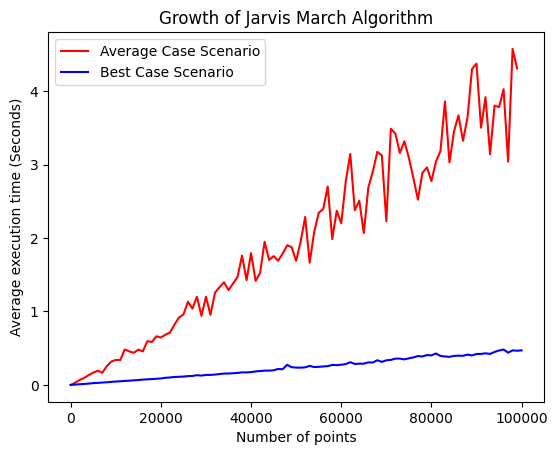

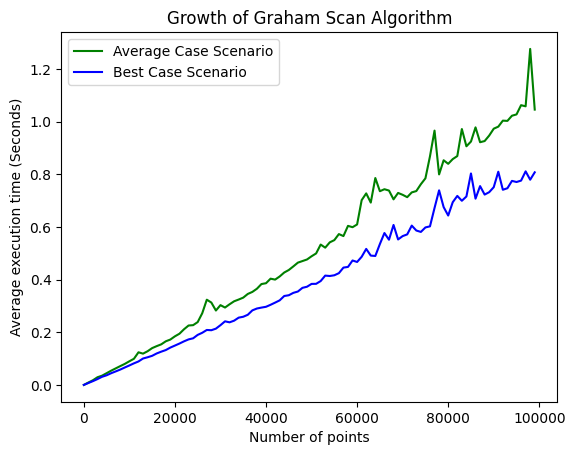

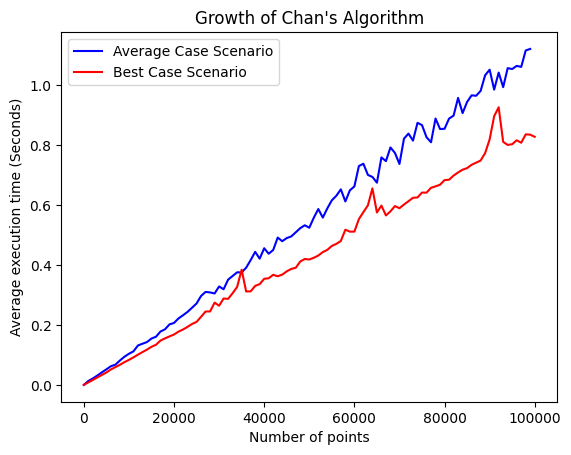

In [150]:

framework = ExperimentalFramework(50)
data = TestDataGenerator()

framework.growth_of_algorithms()



